### Employee Efficiency Analysis


Data source: https://www.kaggle.com/shivan118/hranalysis

In [27]:
## Library Installs
install.packages('car')
install.packages("tidyverse") 
install.packages("ggplot2") 
install.packages('usdm')
install.packages('ggfortify')
install.packages('caTools')
install.packages('party')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('corrplot')
install.packages('rattle')
install.packages("dplyr") 
install.packages('rattle') 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.h

In [28]:
library(car)
library(tidyverse)
library(ggplot2)
library(usdm)
library(ggfortify)
library(caTools)
library(party)
library(rpart)
library(rpart.plot)
library(corrplot)
library(plyr)
library(rattle)
library(dplyr)
library(rattle)
library(datasets) 
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ tibble  3.1.1     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
Loading required package: sp
Loading required package: raster

Attaching package: ‘raster’

The following object is masked from ‘package:tidyr’:

    extract

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘usdm’

The following object is masked from ‘package:car’:

    vif

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4

Attaching package: ‘modeltools’

The following object is masked from ‘package:car’:

    Predict

Loading required package: struc

In [29]:
## Data
data = read.csv('/Users/patkern/Desktop/train.csv')
attach(data)
data <- na.omit(data)
head(data)

The following objects are masked from data (pos = 32):

    KPIs_met, age, avg_training_score, awards_won, department,
    education, employee_id, gender, is_promoted, length_of_service,
    no_of_trainings, previous_year_rating, recruitment_channel, region



employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,0,0,85,0


In [30]:
str(data)
colnames(data)
summary(data)

'data.frame':	50684 obs. of  14 variables:
 $ employee_id         : int  65438 65141 7513 2542 48945 58896 20379 16290 73202 28911 ...
 $ department          : Factor w/ 9 levels "Analytics","Finance",..: 8 5 8 8 9 1 5 5 1 8 ...
 $ region              : Factor w/ 34 levels "region_1","region_10",..: 32 15 11 16 19 12 13 28 13 1 ...
 $ education           : Factor w/ 4 levels "","Bachelor's",..: 4 2 2 2 2 2 2 4 2 4 ...
 $ gender              : Factor w/ 2 levels "f","m": 1 2 2 2 2 2 1 2 2 2 ...
 $ recruitment_channel : Factor w/ 3 levels "other","referred",..: 3 1 3 1 1 3 1 3 1 3 ...
 $ no_of_trainings     : int  1 1 1 2 1 2 1 1 1 1 ...
 $ age                 : int  35 30 34 39 45 31 31 33 28 32 ...
 $ previous_year_rating: int  5 5 3 1 3 3 3 3 4 5 ...
 $ length_of_service   : int  8 4 7 10 2 7 5 6 5 5 ...
 $ KPIs_met            : int  1 0 0 0 0 0 0 0 0 1 ...
 $ awards_won          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : int  49 60 50 50 73 85 59 63 83 54 ...
 $ is_promo

[1] "employee_id"          "department"           "region"              
 [4] "education"            "gender"               "recruitment_channel" 
 [7] "no_of_trainings"      "age"                  "previous_year_rating"
[10] "length_of_service"    "KPIs_met"             "awards_won"          
[13] "avg_training_score"   "is_promoted"

  employee_id                department          region     
 Min.   :    1   Sales & Marketing:15529   region_2 :11535  
 1st Qu.:19598   Operations       :10760   region_22: 5684  
 Median :39181   Procurement      : 6709   region_7 : 4585  
 Mean   :39183   Technology       : 6592   region_15: 2690  
 3rd Qu.:58783   Analytics        : 4886   region_13: 2510  
 Max.   :78298   Finance          : 2253   region_26: 2047  
                 (Other)          : 3955   (Other)  :21633  
            education     gender    recruitment_channel no_of_trainings 
                 : 2024   f:15154   other   :28185      Min.   : 1.000  
 Bachelor's      :33404   m:35530   referred: 1027      1st Qu.: 1.000  
 Below Secondary :  458             sourcing:21472      Median : 1.000  
 Master's & above:14798                                 Mean   : 1.248  
                                                        3rd Qu.: 1.000  
                                                        Max.   :10.000  
 

In [31]:
# The correlation between the variables KPIs_met and previous_year_rating is 0.35
# It is a weak to moderate positive correlation.
cor.test(data$KPIs_met, data$previous_year_rating, method="pearson")

# The correlation between the variables KPIs_met and length_of_service is -0.09
# It is a weak negative correlation.
cor.test(data$KPIs_met, data$length_of_service, method="pearson")

# The correlation between the variables KPIs_met and awards_won is 0.10
# It is a weak positive correlation.
cor.test(data$KPIs_met, data$awards_won, method="pearson")

# The correlation between the variables KPIs_met and avg_training_score is 0.08
# It is a weak positive correlation
cor.test(data$KPIs_met, data$avg_training_score  , method="pearson")

# The correlation between the variables avg_training_score and no_of_trainings is 0.04
# It is a weak positive correlation
cor.test(data$avg_training_score, data$no_of_trainings, method="pearson")

# The correlation between the variables is_promoted and avg_training_score is 0.18
# It is a weak positive correlation
cor.test(data$is_promoted, data$avg_training_score, method="pearson")

# The correlation between the variables is_promoted and KPIs_met is 0.22
# It is a weak positive correlation
cor.test(data$is_promoted, data$KPIs_met, method="pearson")

# The correlation between the variables is_promoted and previous_year_rating is 0.16
# It is a weak positive correlation
cor.test(data$is_promoted, data$previous_year_rating, method="pearson")

# The correlation between the variables is_promoted and awards_won is 0.20
# It is a weak positive correlation
cor.test(data$is_promoted, data$awards_won, method="pearson")

# The correlation between the variables is_promoted and length_of_service is -0.01
# It is a weak negative correlation
cor.test(data$is_promoted, data$length_of_service, method="pearson")


	Pearson's product-moment correlation

data:  data$KPIs_met and data$previous_year_rating
t = 84.547, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3439252 0.3591850
sample estimates:
      cor 
0.3515785 



	Pearson's product-moment correlation

data:  data$KPIs_met and data$length_of_service
t = -19.416, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09456098 -0.07727769
sample estimates:
       cor 
-0.0859258 



	Pearson's product-moment correlation

data:  data$KPIs_met and data$awards_won
t = 21.836, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08790991 0.10515947
sample estimates:
       cor 
0.09654194 



	Pearson's product-moment correlation

data:  data$KPIs_met and data$avg_training_score
t = 17.832, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07030255 0.08760584
sample estimates:
       cor 
0.07896014 



	Pearson's product-moment correlation

data:  data$avg_training_score and data$no_of_trainings
t = 10.013, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03574091 0.05311837
sample estimates:
       cor 
0.04443301 



	Pearson's product-moment correlation

data:  data$is_promoted and data$avg_training_score
t = 41.378, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1723362 0.1891790
sample estimates:
      cor 
0.1807709 



	Pearson's product-moment correlation

data:  data$is_promoted and data$KPIs_met
t = 51.163, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2133193 0.2298761
sample estimates:
      cor 
0.2216137 



	Pearson's product-moment correlation

data:  data$is_promoted and data$previous_year_rating
t = 36.331, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1508234 0.1677933
sample estimates:
      cor 
0.1593201 



	Pearson's product-moment correlation

data:  data$is_promoted and data$awards_won
t = 45.343, df = 50682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1890651 0.2057982
sample estimates:
      cor 
0.1974461 



	Pearson's product-moment correlation

data:  data$is_promoted and data$length_of_service
t = -2.8826, df = 50682, p-value = 0.003946
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.021506699 -0.004097718
sample estimates:
        cor 
-0.01280318 


Quantitative variables: no_of_trainings, age, previous_year_rating, length_of_service, awards_won, avg_training_score

Qualitative variables: department, region, education, gender, recruitment_channel

We can treat KPIs_met and is_promoted either as a factor or as an integer, depending on the type of analysis.

In [44]:
## Multiple Linear Regression Models

lm.fit1 =lm(avg_training_score~no_of_trainings,data=data )

lm.fit2 =lm(KPIs_met~.,data=data )

lm.fit3 =lm(is_promoted~.,data=data )

lm.fit4 =lm(KPIs_met~no_of_trainings+age+previous_year_rating+length_of_service+awards_won+avg_training_score,data=data )

lm.fit5 =lm(length_of_service~age+KPIs_met+no_of_trainings+awards_won+is_promoted,data=data )

In [33]:
summary(lm.fit1)
summary(lm.fit2)
summary(lm.fit3)
summary(lm.fit4)
summary(lm.fit5)


Call:
lm(formula = avg_training_score ~ no_of_trainings, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.131 -12.144  -3.144  11.869  35.856 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.1567     0.1366  455.12   <2e-16 ***
no_of_trainings   0.9872     0.0986   10.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.32 on 50682 degrees of freedom
Multiple R-squared:  0.001974,	Adjusted R-squared:  0.001955 
F-statistic: 100.3 on 1 and 50682 DF,  p-value: < 2.2e-16



Call:
lm(formula = KPIs_met ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1479 -0.3347 -0.1549  0.4437  1.1695 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  7.066e-01  4.602e-02  15.352  < 2e-16 ***
employee_id                 -4.127e-08  8.508e-08  -0.485 0.627662    
departmentFinance           -1.978e-01  1.577e-02 -12.542  < 2e-16 ***
departmentHR                -3.624e-01  1.947e-02 -18.611  < 2e-16 ***
departmentLegal             -2.659e-01  1.964e-02 -13.543  < 2e-16 ***
departmentOperations        -1.855e-01  1.363e-02 -13.607  < 2e-16 ***
departmentProcurement       -1.166e-01  1.082e-02 -10.775  < 2e-16 ***
departmentR&D                1.362e-02  1.572e-02   0.866 0.386385    
departmentSales & Marketing -3.591e-01  1.734e-02 -20.708  < 2e-16 ***
departmentTechnology        -5.809e-02  8.782e-03  -6.615 3.75e-11 ***
regionregion_10             -7.819e-02  2.527e-02  -3.094 0.001


Call:
lm(formula = is_promoted ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52216 -0.11811 -0.04916  0.01864  1.07023 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.940e+00  2.454e-02 -79.049  < 2e-16 ***
employee_id                 -2.329e-08  4.798e-08  -0.485 0.627406    
departmentFinance            5.440e-01  8.572e-03  63.461  < 2e-16 ***
departmentHR                 7.654e-01  1.048e-02  73.038  < 2e-16 ***
departmentLegal              5.332e-01  1.084e-02  49.209  < 2e-16 ***
departmentOperations         5.564e-01  7.291e-03  76.307  < 2e-16 ***
departmentProcurement        3.430e-01  5.916e-03  57.973  < 2e-16 ***
departmentR&D               -3.874e-02  8.862e-03  -4.372 1.24e-05 ***
departmentSales & Marketing  7.939e-01  9.163e-03  86.644  < 2e-16 ***
departmentTechnology         1.328e-01  4.919e-03  27.006  < 2e-16 ***
regionregion_10              9.108e-03  1.425e-02 


Call:
lm(formula = KPIs_met ~ no_of_trainings + age + previous_year_rating + 
    length_of_service + awards_won + avg_training_score, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9251 -0.3421 -0.1754  0.4403  1.1503 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.1667874  0.0155174 -10.748  < 2e-16 ***
no_of_trainings      -0.0218508  0.0032967  -6.628 3.44e-11 ***
age                   0.0021145  0.0003334   6.343 2.28e-10 ***
previous_year_rating  0.1304085  0.0015688  83.128  < 2e-16 ***
length_of_service    -0.0117308  0.0006008 -19.525  < 2e-16 ***
awards_won            0.2516612  0.0131244  19.175  < 2e-16 ***
avg_training_score    0.0016522  0.0001486  11.117  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4426 on 50677 degrees of freedom
Multiple R-squared:  0.1413,	Adjusted R-squared:  0.1412 
F-statistic:  1390 on 6 and 50677 DF,  p-val


Call:
lm(formula = length_of_service ~ age + KPIs_met + no_of_trainings + 
    awards_won + is_promoted, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9362  -1.9482  -0.0303   1.7406  22.1083 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.684092   0.079441 -71.551  < 2e-16 ***
age              0.344415   0.001921 179.321  < 2e-16 ***
KPIs_met        -0.606772   0.031179 -19.461  < 2e-16 ***
no_of_trainings -0.044565   0.024240  -1.839    0.066 .  
awards_won      -0.978689   0.098363  -9.950  < 2e-16 ***
is_promoted      0.330839   0.054045   6.122 9.33e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.26 on 50678 degrees of freedom
Multiple R-squared:  0.3957,	Adjusted R-squared:  0.3956 
F-statistic:  6636 on 5 and 50678 DF,  p-value: < 2.2e-16


In [43]:
f_statistic <- lm.fit5$fstatistic[1] 
f <- summary(lm.fit5)$fstatistic  # parameters for model p-value calculation
print(f) 

    value     numdf     dendf 
 6635.954     5.000 50678.000 


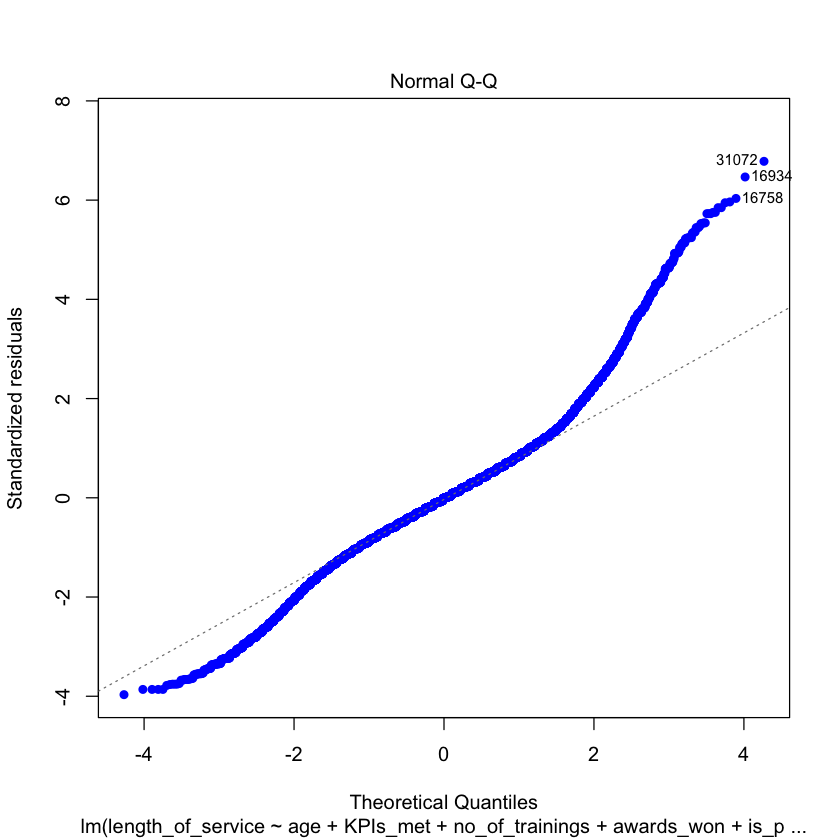

In [35]:
plot(lm.fit5, pch=16, col="blue", lty=1, lwd=2, which=2)

In [26]:
vif(lm.fit5)

age        KPIs_met no_of_trainings      awards_won     is_promoted 
       1.008112        1.057483        1.009250        1.043779        1.087885

ERROR: Error: Objects of type lm not supported by autoplot.


Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

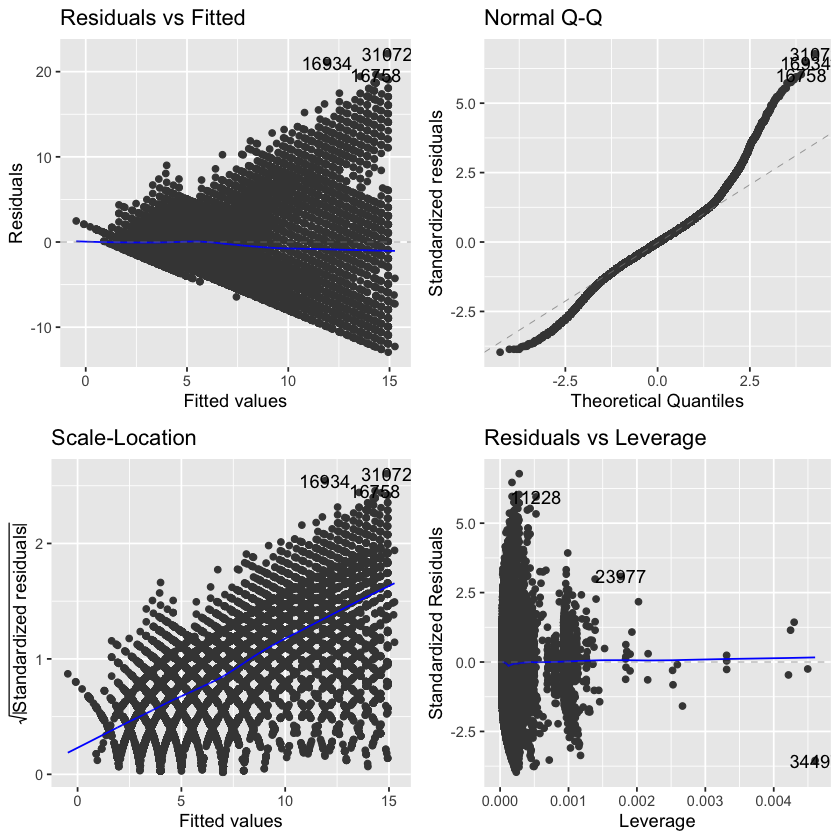

In [51]:
autoplot(lm.fit5)

In [47]:
## Decision Tree
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
sapply(data, class)
sapply(train, class)

employee_id           department               region 
           "integer"             "factor"             "factor" 
           education               gender  recruitment_channel 
            "factor"             "factor"             "factor" 
     no_of_trainings                  age previous_year_rating 
           "integer"            "integer"            "integer" 
   length_of_service             KPIs_met           awards_won 
           "integer"            "integer"            "integer" 
  avg_training_score          is_promoted 
           "integer"            "integer"

employee_id           department               region 
           "integer"          "character"          "character" 
           education               gender  recruitment_channel 
         "character"          "character"          "character" 
     no_of_trainings                  age previous_year_rating 
           "integer"            "integer"            "integer" 
   length_of_service        KPIs_met..80.          awards_won. 
           "integer"            "integer"            "integer" 
  avg_training_score          is_promoted 
           "integer"            "integer"

n= 54808 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 54808 4668 0 (0.914829952 0.085170048)  
    2) KPIs_met< 0.5 35517 1406 0 (0.960413323 0.039586677)  
      4) avg_training_score< 57.5 15454   17 0 (0.998899961 0.001100039) *
      5) avg_training_score>=57.5 20063 1389 0 (0.930768081 0.069231919)  
       10) department=Analytics,Finance,Legal,Operations,Procurement,R&D,Technology 19661 1012 0 (0.948527542 0.051472458)  
         20) previous_year_rating< 4.5 17513  533 0 (0.969565466 0.030434534)  
           40) awards_won< 0.5 17333  441 0 (0.974557203 0.025442797)  
             80) avg_training_score< 67.5 6411   12 0 (0.998128217 0.001871783) *
             81) avg_training_score>=67.5 10922  429 0 (0.960721480 0.039278520)  
              162) department=Analytics,Procurement,R&D,Technology 10737  263 0 (0.975505262 0.024494738) *
              163) department=Finance,Legal,Operations 185   19 1 (0.102702703 0.897297297) *
           41)

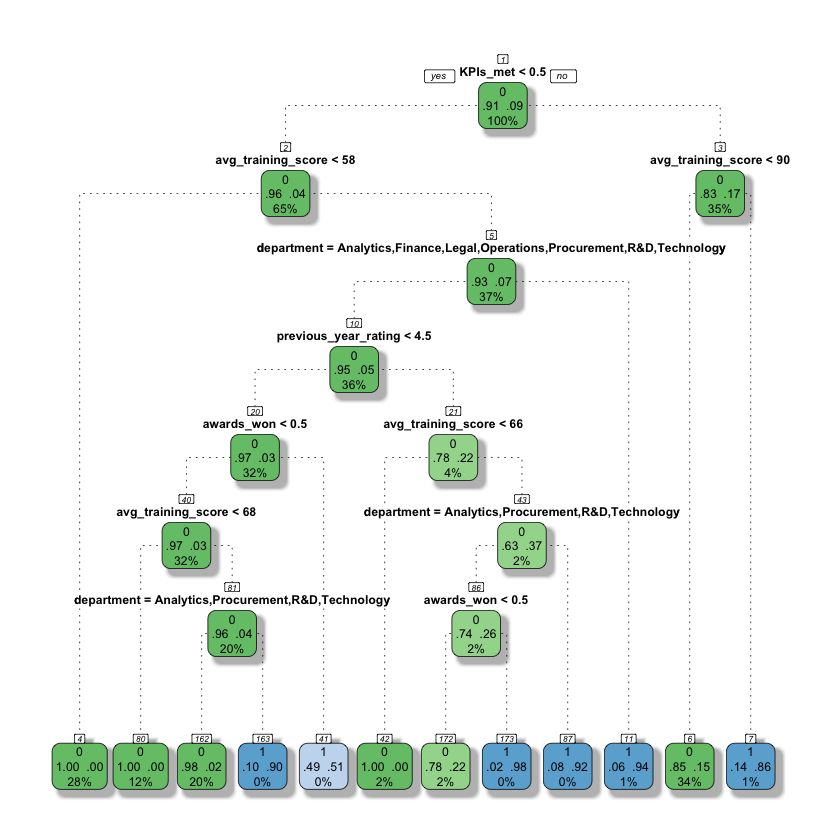

In [52]:
model <- rpart(
  is_promoted ~ KPIs_met + employee_id + department + region + education + gender + recruitment_channel + no_of_trainings + age + previous_year_rating + length_of_service + awards_won + avg_training_score, data=train, 
  method = "class",
  parms = list(split = 'information'), 
  minsplit = 2, 
  minbucket = 1
)
print(model)
rattle::fancyRpartPlot(model, type = 1, sub = "")


In [49]:
model$variable.importance
# Comments:
# It seems that the most important factorrs are department, avg_training_score, KPIs_met, and previous_year_rating
# Other factors that important are awards_won, region, and education.
# Factors such as age, length_of_service, recruitment_channel, and employee_id are least important.

department   avg_training_score             KPIs_met 
        2613.0025309         1713.4117944         1276.2093669 
previous_year_rating           awards_won               region 
         492.0210428          305.4863569           39.8615615 
           education                  age    length_of_service 
          36.3475985            6.6246847            2.8723185 
 recruitment_channel      no_of_trainings          employee_id 
           1.1908024            0.5719152            0.4345511

n= 54808 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 54808 4668 0 (0.91482995 0.08517005)  
  2) KPIs_met< 0.5 35517 1406 0 (0.96041332 0.03958668) *
  3) KPIs_met>=0.5 19291 3262 0 (0.83090560 0.16909440)  
    6) avg_training_score< 89.5 18848 2879 0 (0.84725170 0.15274830) *
    7) avg_training_score>=89.5 443   60 1 (0.13544018 0.86455982) *


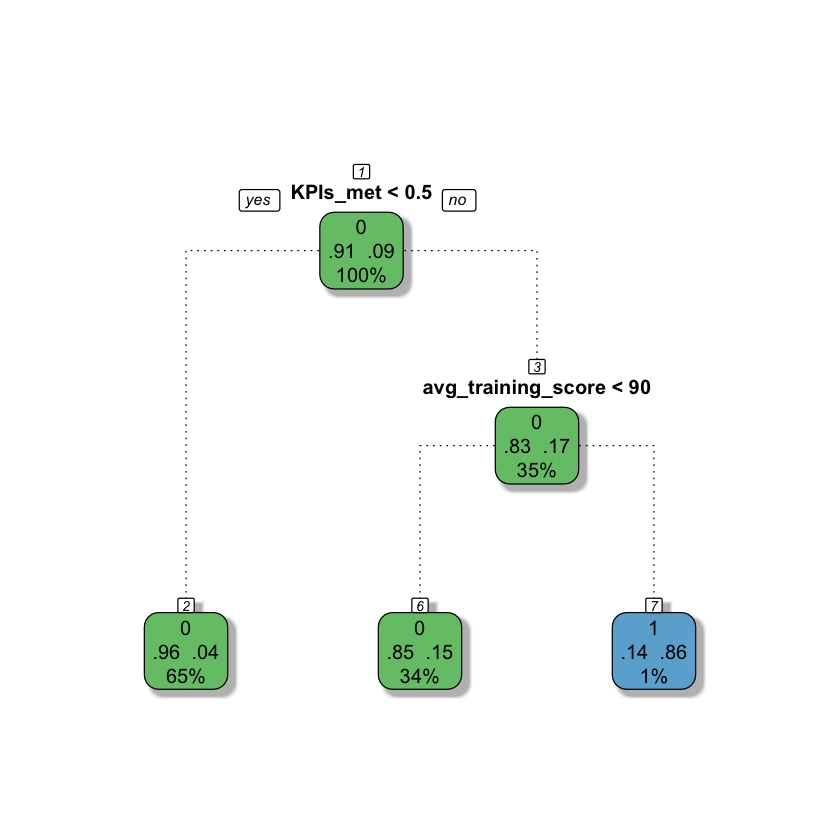

In [53]:
model2 <- rpart(
  is_promoted ~ KPIs_met + region + education + gender + recruitment_channel + no_of_trainings + age + previous_year_rating + length_of_service + awards_won + avg_training_score, data=train, 
  method = "class",
  parms = list(split = 'information'), 
  minsplit = 2, 
  minbucket = 1
)
# View model info
print(model2)

# Show tree with labels
rattle::fancyRpartPlot(model2, type = 1, sub = "")

In [54]:
test <- data
tree.pred <- predict(model, test, type = "class")
test$is_promoted = tree.pred
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
1,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
2,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
3,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
4,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
5,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
6,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,0,0,85,0
7,20379,Operations,region_20,Bachelor's,f,other,1,31,3,5,0,0,59,0
8,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3,6,0,0,63,0
9,73202,Analytics,region_20,Bachelor's,m,other,1,28,4,5,0,0,83,0
10,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5,5,1,0,54,0


In [1]:
# KNN
library(class)

In [2]:
set.seed(9760)
gp <- runif(nrow(data))
data2 <- data[order(gp),]
str(data2)
head(data2,20) 
data2[is.na(data2)] <- 0
normalize <- function(x) { return((x - min(x)) / (max(x) - min(x)))}
data_new <- as.data.frame(lapply(data2[, c(7,8,9,10,11,12,13)], normalize))
summary(data_new)
data_train <- data_new[1:54000, ]
data_test <- data_new[54001:54808, ]
data_train_target <- data2[1:54000, 14]
data_test_target <- data2[54001:54808, 14]
sqrt(54808)
m1 <- knn(train = data_train, data_test, cl = data_train_target, k =235)
m1
table(data_test_target, m1)


'data.frame':	54808 obs. of  14 variables:
 $ employee_id         : int  54978 76274 146 72916 61694 12092 64195 45099 28502 35664 ...
 $ department          : chr  "Operations" "Technology" "Analytics" "Operations" ...
 $ region              : chr  "region_15" "region_23" "region_2" "region_27" ...
 $ education           : chr  "Bachelor's" "Master's & above" "Bachelor's" "Bachelor's" ...
 $ gender              : chr  "m" "m" "m" "m" ...
 $ recruitment_channel : chr  "other" "other" "other" "other" ...
 $ no_of_trainings     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age                 : int  40 31 39 44 34 46 36 33 42 48 ...
 $ previous_year_rating: int  1 1 3 5 1 3 5 4 1 1 ...
 $ length_of_service   : int  2 2 3 11 3 3 8 2 6 6 ...
 $ KPIs_met..80.       : int  0 0 0 1 0 0 1 1 0 0 ...
 $ awards_won.         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : int  60 77 86 55 51 46 62 47 49 83 ...
 $ is_promoted         : int  0 0 0 0 0 0 0 0 0 0 ...


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
51256,54978,Operations,region_15,Bachelor's,m,other,1,40,1,2,0,0,60,0
15772,76274,Technology,region_23,Master's & above,m,other,1,31,1,2,0,0,77,0
18935,146,Analytics,region_2,Bachelor's,m,other,1,39,3,3,0,0,86,0
466,72916,Operations,region_27,Bachelor's,m,other,1,44,5,11,1,0,55,0
27819,61694,Sales & Marketing,region_27,,m,other,1,34,1,3,0,0,51,0
13061,12092,Sales & Marketing,region_2,Bachelor's,f,other,1,46,3,3,0,0,46,0
51629,64195,Operations,region_22,Master's & above,f,referred,1,36,5,8,1,0,62,0
10881,45099,Sales & Marketing,region_7,Bachelor's,m,other,1,33,4,2,1,0,47,0
49453,28502,Sales & Marketing,region_2,Bachelor's,m,other,1,42,1,6,0,0,49,0
25970,35664,Technology,region_13,Bachelor's,m,other,1,48,1,6,0,0,83,0


 no_of_trainings        age         previous_year_rating length_of_service
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000       Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.2250   1st Qu.:0.4000       1st Qu.:0.05556  
 Median :0.00000   Median :0.3250   Median :0.6000       Median :0.11111  
 Mean   :0.02811   Mean   :0.3701   Mean   :0.6157       Mean   :0.13515  
 3rd Qu.:0.00000   3rd Qu.:0.4750   3rd Qu.:0.8000       3rd Qu.:0.16667  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000       Max.   :1.00000  
 KPIs_met..80.    awards_won.      avg_training_score
 Min.   :0.000   Min.   :0.00000   Min.   :0.0000    
 1st Qu.:0.000   1st Qu.:0.00000   1st Qu.:0.2000    
 Median :0.000   Median :0.00000   Median :0.3500    
 Mean   :0.352   Mean   :0.02317   Mean   :0.4064    
 3rd Qu.:1.000   3rd Qu.:0.00000   3rd Qu.:0.6167    
 Max.   :1.000   Max.   :1.00000   Max.   :1.0000    

[1] 234.1111

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

                m1
data_test_target   0   1
               0 743   2
               1  61   2

In [3]:
set.seed(9760)
data_new2 <- as.data.frame(lapply(data2[, c(7,9,11,12,13)], normalize))
summary(data_new2)
data_train2 <- data_new2[1:54000, ]
data_test2 <- data_new2[54001:54808, ]
data_train_target2 <- data2[1:54000, 14]
data_test_target2 <- data2[54001:54808, 14]
sqrt(54808)
m2 <- knn(train = data_train2, data_test2, cl = data_train_target2, k =235)
m2
table(data_test_target2, m2)

 no_of_trainings   previous_year_rating KPIs_met..80.    awards_won.     
 Min.   :0.00000   Min.   :0.0000       Min.   :0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.4000       1st Qu.:0.000   1st Qu.:0.00000  
 Median :0.00000   Median :0.6000       Median :0.000   Median :0.00000  
 Mean   :0.02811   Mean   :0.6157       Mean   :0.352   Mean   :0.02317  
 3rd Qu.:0.00000   3rd Qu.:0.8000       3rd Qu.:1.000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000       Max.   :1.000   Max.   :1.00000  
 avg_training_score
 Min.   :0.0000    
 1st Qu.:0.2000    
 Median :0.3500    
 Mean   :0.4064    
 3rd Qu.:0.6167    
 Max.   :1.0000    

[1] 234.1111

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

                 m2
data_test_target2   0   1
                0 745   0
                1  61   2